<a href="https://colab.research.google.com/github/Sujirapat/229352-StatisticalLearning-DS2/blob/main/660510778_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [21]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

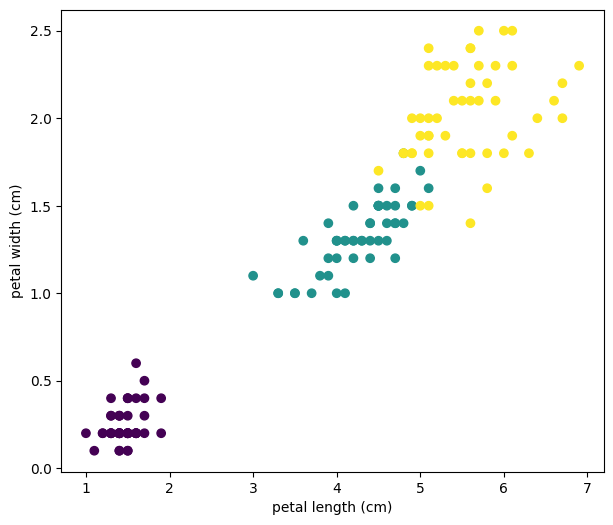

In [22]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [23]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [24]:
#TODO

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

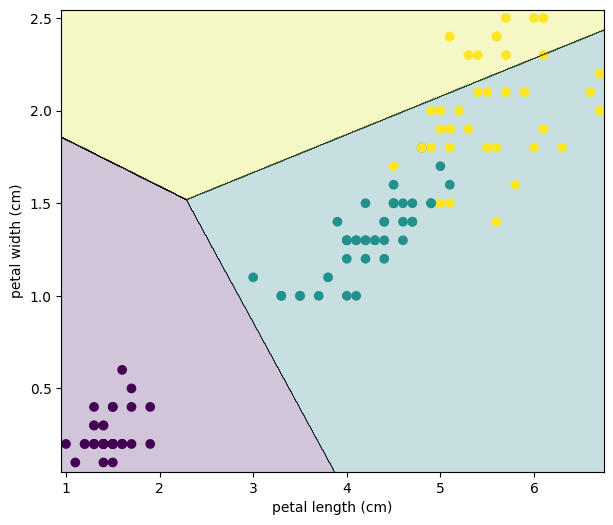

In [25]:
#C = 0.01
linsvc = LinearSVC(C=0.01, loss='hinge', max_iter=100000)
linsvc.fit(x_train, y_train)
plot_decision_boundary(linsvc, x_train, y_train)

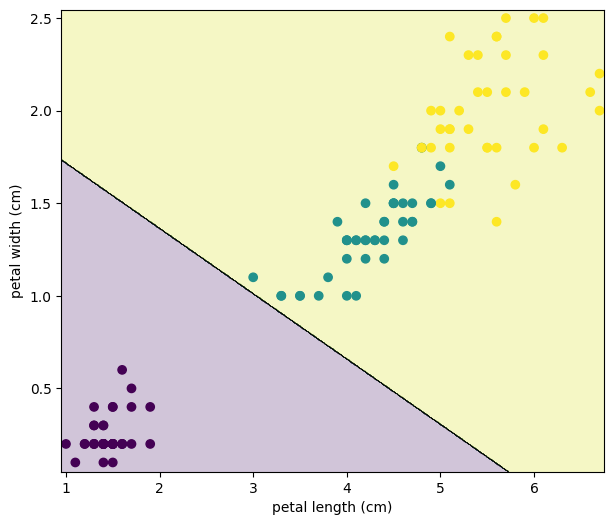

In [26]:
#C = 0.1
linsvc = LinearSVC(C=0.1, loss='hinge', max_iter=100000)
linsvc.fit(x_train, y_train)
plot_decision_boundary(linsvc, x_train, y_train)

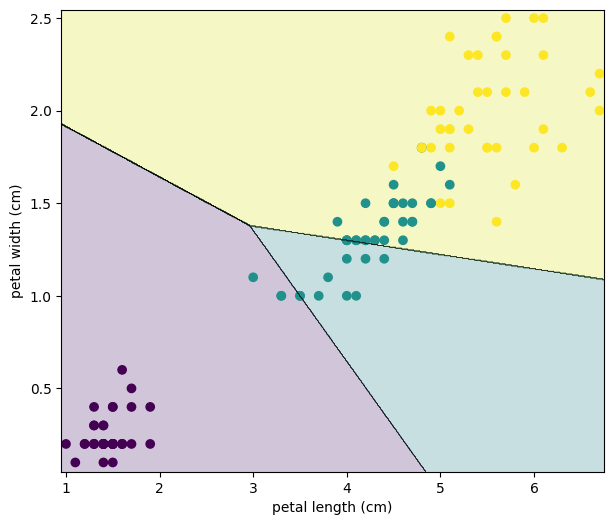

In [27]:
#C = 1.0
linsvc = LinearSVC(C=1.0, loss='hinge', max_iter=100000)
linsvc.fit(x_train, y_train)
plot_decision_boundary(linsvc, x_train, y_train)

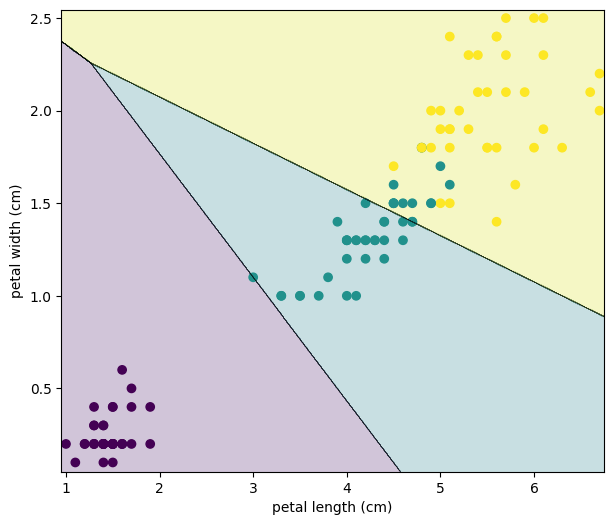

In [28]:
#C = 10.0
linsvc = LinearSVC(C=10.0, loss='hinge', max_iter=100000)
linsvc.fit(x_train, y_train)
plot_decision_boundary(linsvc, x_train, y_train)

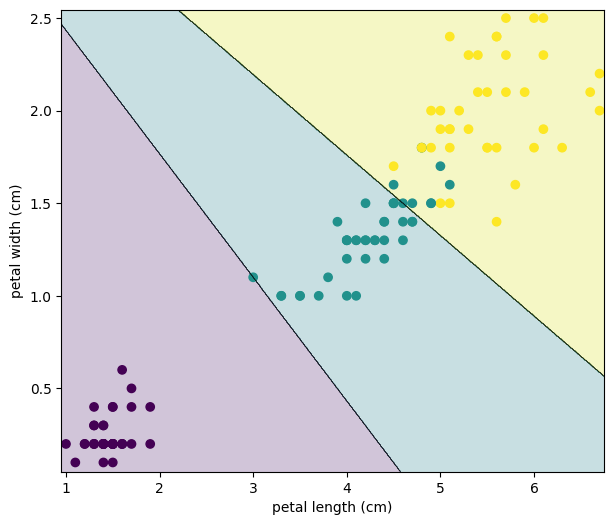

In [29]:
#C = 100.0
linsvc = LinearSVC(C=100.0, loss='hinge', max_iter=100000)
linsvc.fit(x_train, y_train)
plot_decision_boundary(linsvc, x_train, y_train)

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [30]:
#C = 100.0
linsvc = LinearSVC(C=100.0, loss='hinge', max_iter=100000)
linsvc.fit(x_train, y_train)

LinearSVC(C=100.0, loss='hinge', max_iter=100000)

In [31]:
from sklearn.metrics import accuracy_score

y_pred = linsvc.predict(x_test)
test_error = 1 - accuracy_score(y_test, y_pred)
print(f"Test error : {test_error:.4f}")

Test error : 0.0333


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

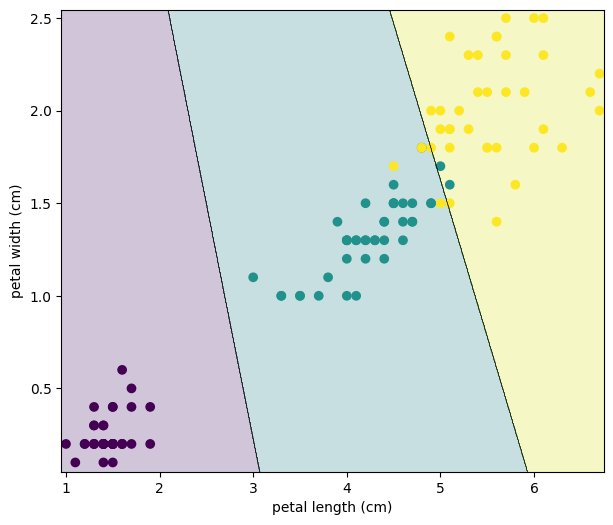

In [32]:
#gamma=0.01
svc = SVC(kernel='rbf', C=1.0, gamma=0.01)
svc.fit(x_train, y_train)
plot_decision_boundary(svc, x_train, y_train)

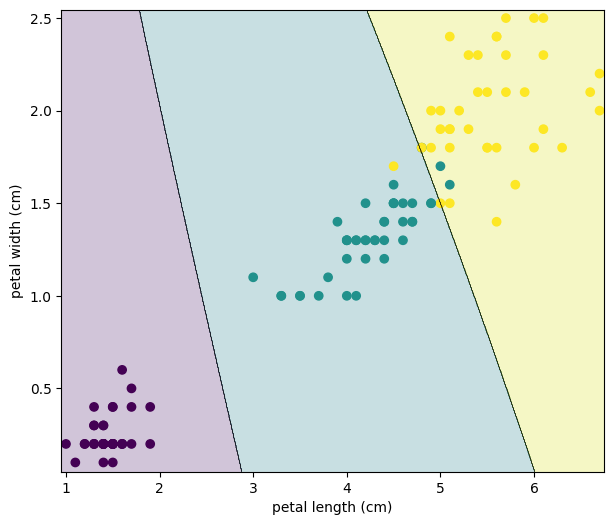

In [33]:
#gamma=0.1
svc = SVC(kernel='rbf', C=1.0, gamma=0.1)
svc.fit(x_train, y_train)
plot_decision_boundary(svc, x_train, y_train)

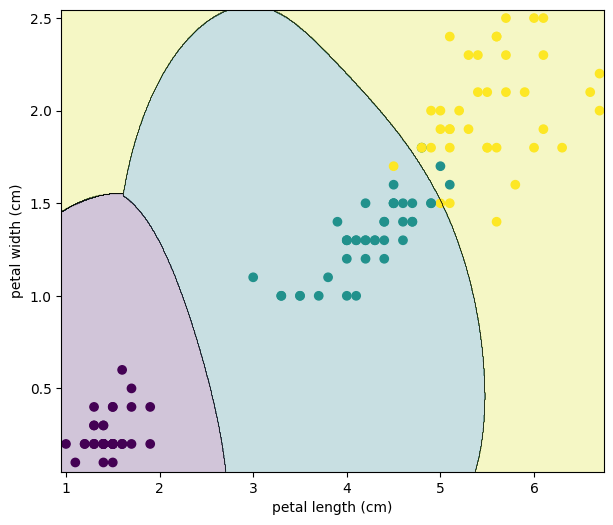

In [34]:
#gamma=1.0
svc = SVC(kernel='rbf', C=1.0, gamma=1.0)
svc.fit(x_train, y_train)
plot_decision_boundary(svc, x_train, y_train)

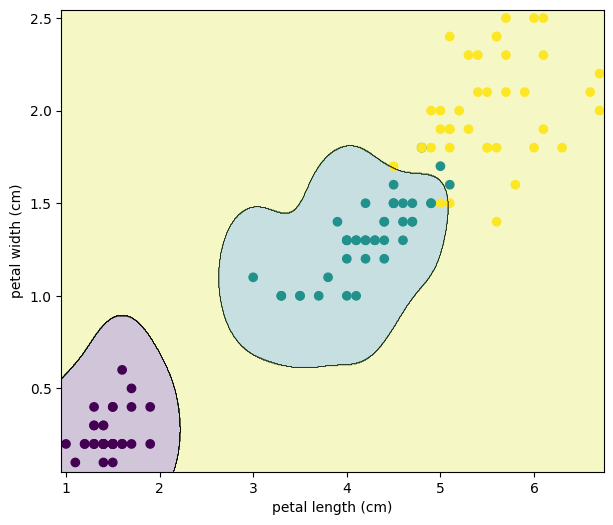

In [35]:
#gamma=10.0
svc = SVC(kernel='rbf', C=1.0, gamma=10.0)
svc.fit(x_train, y_train)
plot_decision_boundary(svc, x_train, y_train)

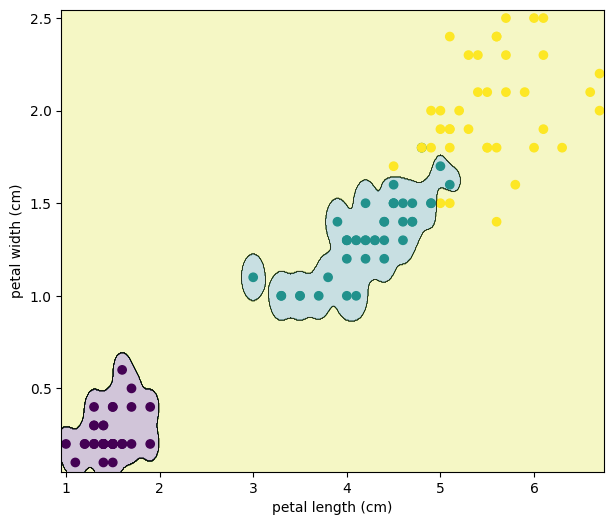

In [36]:
#gamma=100.0
svc = SVC(kernel='rbf', C=1.0, gamma=100.0)
svc.fit(x_train, y_train)
plot_decision_boundary(svc, x_train, y_train)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

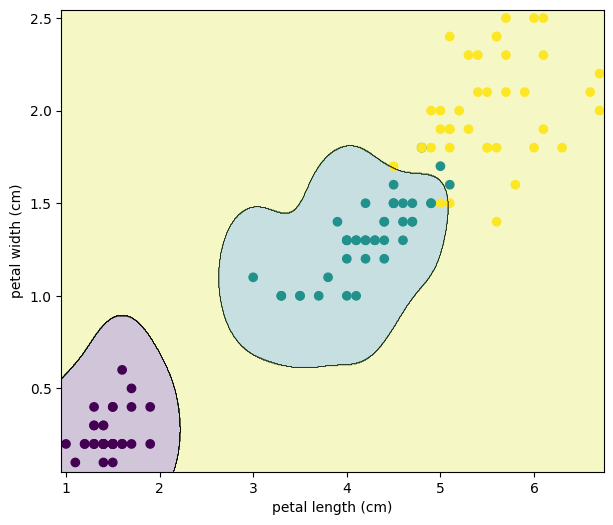

In [37]:
#gamma = 10.0
svc = SVC(kernel='rbf', C=1.0, gamma=10.0)
svc.fit(x_train, y_train)
plot_decision_boundary(svc, x_train, y_train)

In [38]:
from sklearn.metrics import accuracy_score

y_pred_svc = svc.predict(x_test)
test_error_svc = 1 - accuracy_score(y_test, y_pred_svc)
print(f"Test error : {test_error_svc:.4f}")
print(f"Number of support vectors: {svc.support_vectors_.shape[0]}")

Test error : 0.0000
Number of support vectors: 52


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot


1. Explain using test accuracy
####  Linear SVM  C=100.0 มี test error=0.0333
#### Kernel SVM  gamma=10.0 มี test error=0.0000
#### ค่า test error สรุปได้ว่า Kernel SVM มีความแม่นยำกว่าจึงเหมาะสมมากกว่าสำหรับใช้ในการแบ่งคลาส Iris data
2. Explaing using decision boundary plot
#### Linear SVM แสดงเส้นตรงที่แบ่งคลาสต่างๆ และค่า C ที่ต่ำจะได้ขอบเขตที่เรียบกว่า ส่วนค่า C ที่สูงขึ้นจะมีความไวต่อจุดข้อมูลแต่ละจุดมากขึ้น
#### Kernel SVM แสดงขอบเขตที่ไม่เป็นเชิงเส้น เมื่อค่า gamma เพิ่มขึ้น ขอบเขตจะซับซ้อนขึ้นและล้อมจุดข้อมูลใกล้ขึ้น จาก gamma=100.0 ขอบเขตล้อมจุดข้อมูลใกล้มาก สรุปได้ว่าโมเดลจำแนกแต่ละจุดได้ดี